Title: Meta turns to nuclear energy for its AI ambitions
Sentiment Polarity: 0.00

Title: Tim Cook Wants Apple to Literally Save Your Life
Sentiment Polarity: 0.20

Title: OpenAI Continues Its Mission of ‘Ethical’ AI by Partnering With a Killer Robot Company
Sentiment Polarity: 0.20

Title: Billionaire Marc Benioff, Owner of Time, Uses Magazine to Promote His AI Software
Sentiment Polarity: 0.00

Title: AI Was Everywhere in 2024’s Elections, but Deepfakes Were Only Part of the Picture
Sentiment Polarity: 0.00

Title: This Samsung Refrigerator With The AI Family Hub Is Now Priced Down to $2,210 From $4,999 For Black Friday
Sentiment Polarity: -0.16

Title: 7 experimental Google AI projects you can try right now
Sentiment Polarity: 0.19

Title: How U.S. Cities Are Using AI to Solve Common Problems
Sentiment Polarity: -0.30

Title: Amazon Goes Big This Black Friday, The Most Luxurious LG G4 OLED TVs at Record Low Prices
Sentiment Polarity: 0.08

Title: Canada's government is opening a res

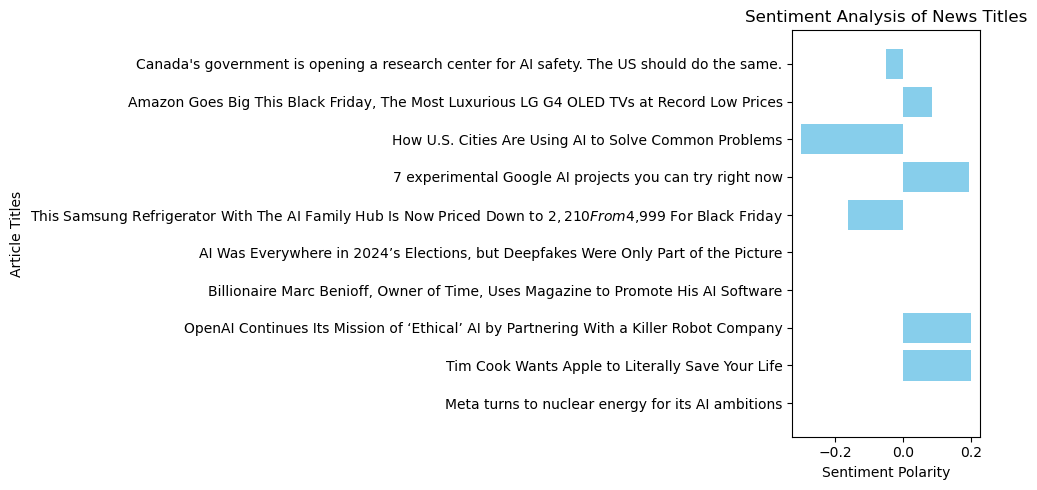

In [5]:
from newsapi import NewsApiClient
import requests
from env import api_key
from textblob import TextBlob
import matplotlib.pyplot as plt

# Function to fetch news articles
def fetch_news(api_key, query="AI technologies", limit=10):
    url = f"https://newsapi.org/v2/everything?q={query}&apiKey={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        data = response.json()
        if data.get("status") == "ok" and "articles" in data:
            # Extract titles and filter out invalid ones
            titles = [
                article['title'] for article in data['articles']
                if article.get('title') and not any(
                    word in article['title'].lower() for word in ['removed', 'null']
                )
            ]
            return titles[:limit]
        else:
            print("Error in API response:", data.get("message", "Unknown error"))
            return []
    except requests.exceptions.RequestException as e:
        print("Error fetching news:", e)
        return []

# Function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Function to visualize sentiment results
def visualize_sentiments(titles, sentiments):
    plt.figure(figsize=(10, 5))
    plt.barh(titles, sentiments, color='skyblue')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Article Titles')
    plt.title('Sentiment Analysis of News Titles')
    plt.tight_layout()  # Adjust layout for better readability
    plt.show()

# Main script
if __name__ == "__main__":
    # Fetch and analyze news
    news_titles = fetch_news(api_key, query="AI technologies", limit=10)
    if news_titles:
        sentiments = [analyze_sentiment(title) for title in news_titles]
        
        # Display sentiment results in text
        for title, sentiment in zip(news_titles, sentiments):
            print(f"Title: {title}\nSentiment Polarity: {sentiment:.2f}\n")
        
        # Visualize results
        visualize_sentiments(news_titles, sentiments)
    else:
        print("No news articles found or an error occurred.")


#Sentiment analysis with TextBlob assigns a polarity score to each piece of text. This score ranges from -1 to 1:
# -1 indicates a very negative sentiment.
# 0 indicates a neutral sentiment.
# 1 indicates a very positive sentiment.